**Part 1 – Basic Data Understanding (Pandas)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, diff, simplify

df=pd.read_csv('C:/Users/vinot/Downloads/Employee_Salary_Dataset.csv')

df.head()



,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [4]:

print(df.shape)

print(df.dtypes)

print(df.isnull().sum())

print(df.describe(include="all"))

print(df.duplicated().sum())

(35, 5)
ID                   int64
Experience_Years     int64
Age                  int64
Gender              object
Salary               int64
dtype: object
ID                  0
Experience_Years    0
Age                 0
Gender              0
Salary              0
dtype: int64
               ID  Experience_Years        Age  Gender        Salary
count   35.000000          35.00000  35.000000      35  3.500000e+01
unique        NaN               NaN        NaN       2           NaN
top           NaN               NaN        NaN  Female           NaN
freq          NaN               NaN        NaN      18           NaN
mean    18.000000           9.20000  35.485714     NaN  2.059147e+06
std     10.246951           7.55295  14.643552     NaN  3.170124e+06
min      1.000000           1.00000  17.000000     NaN  3.000000e+03
25%      9.500000           2.50000  22.500000     NaN  2.250000e+04
50%     18.000000           6.00000  29.000000     NaN  2.500000e+05
75%     26.500000          15.

**Part 2 – EDA (Exploratory Data Analysis)**

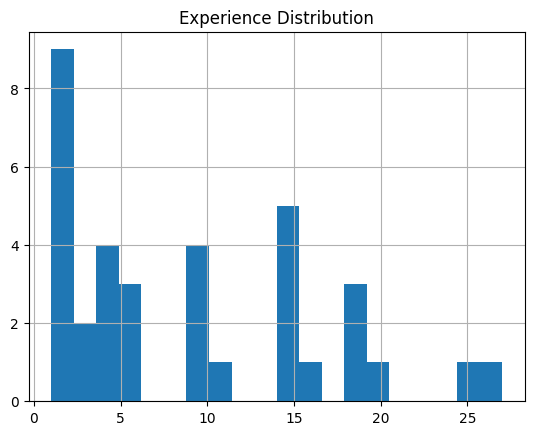

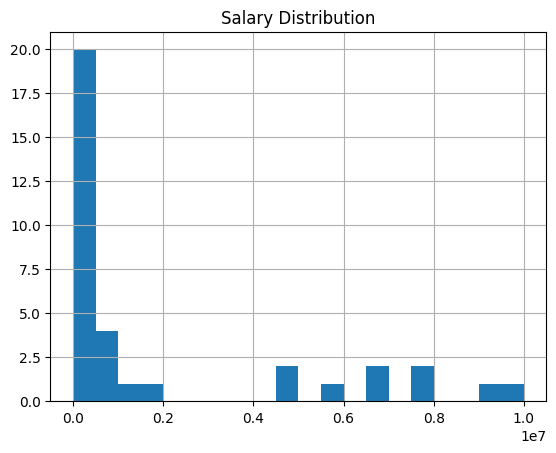

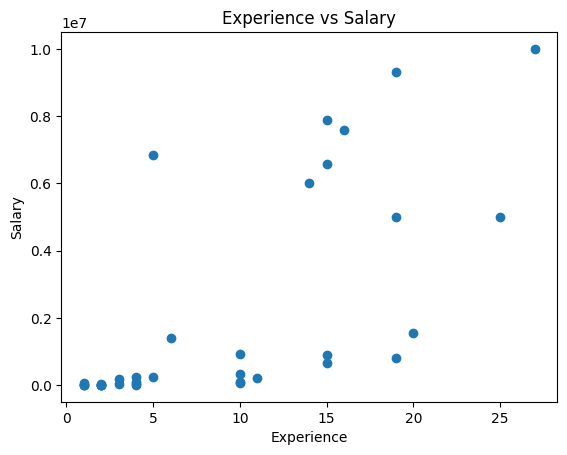

Top 5 by Salary:
     ID  Experience_Years  Age  Gender    Salary
27  28                27   62  Female  10000000
33  34                19   53  Female   9300000
17  18                15   54  Female   7900000
34  35                16   49    Male   7600000
22  23                 5   29    Male   6845000
Bottom 5 by Experience:
     ID  Experience_Years  Age  Gender  Salary
1    2                 1   21    Male   50000
4    5                 1   17    Male   10000
23  24                 1   21  Female    6000
26  27                 1   18    Male    3000
3    4                 2   22    Male   25000


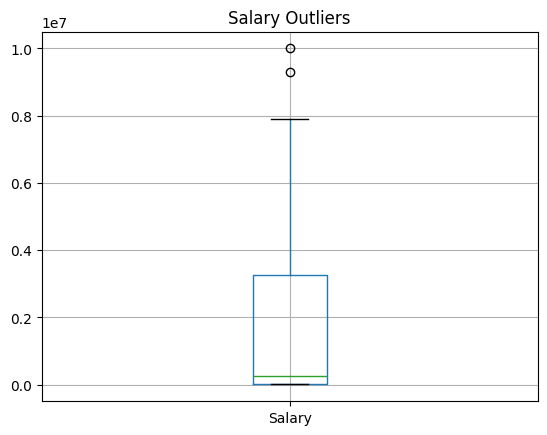

In [5]:
df["Experience_Years"].hist(bins=20); plt.title("Experience Distribution"); plt.show()
df["Salary"].hist(bins=20); plt.title("Salary Distribution"); plt.show()

plt.scatter(df["Experience_Years"], df["Salary"])
plt.xlabel("Experience"); plt.ylabel("Salary"); plt.title("Experience vs Salary"); plt.show()

print("Top 5 by Salary:\n", df.nlargest(5,"Salary"))
print("Bottom 5 by Experience:\n", df.nsmallest(5,"Experience_Years"))

df.boxplot(column="Salary"); plt.title("Salary Outliers"); plt.show()


**Part 3: Statistics**

In [6]:
print("Mean Salary:", df["Salary"].mean())
print("Median Salary:", df["Salary"].median())
print("Mode Salary:", df["Salary"].mode()[0])
print("Variance:", df["Salary"].var())
print("Std Dev:", df["Salary"].std())
print("Correlation (Experience vs Salary):", df["Experience_Years"].corr(df["Salary"]))

df["Investment"] = df["Experience_Years"]*10000
df["ROI"] = (df["Salary"] - df["Investment"]) / df["Investment"] * 100
print("Probaility(ROI>50%) =", (df["ROI"]>50).mean())

Mean Salary: 2059147.142857143
Median Salary: 250000.0
Mode Salary: 25000
Variance: 10049683866903.361
Std Dev: 3170123.635901818
Correlation (Experience vs Salary): 0.6855999775494617
Probaility(ROI>50%) = 0.6285714285714286


**Part 4: Linear Algebra**



In [7]:
invest = df["Investment"].values
rev = df["Salary"].values
print("Dot Product:", np.dot(invest, rev))
features = np.vstack([invest,rev]).T
weights = np.array([0.5,0.5])
print("Matrix Mult (first 5):", (features @ weights)[:5])

Dot Product: 12211846000000
Matrix Mult (first 5): [150000.  30000. 100000.  22500.  10000.]


**Part 5: Calculus**

In [8]:
from sympy import symbols, diff, simplify
I, R = symbols("I R", positive=True)
ROI_expr = (R - I) / I
dROI_dI = diff(ROI_expr, I)
print("ROI Expression:", simplify(ROI_expr))
print("Derivative wrt I:", simplify(dROI_dI))

ROI Expression: (-I + R)/I
Derivative wrt I: -R/I**2


**Part 6: Feature Engineering**

In [9]:
df["High_Performance"] = (df["ROI"]>50).astype(int)
df["Revenue_Per_Thousand_Invested"] = df["Salary"]/(df["Investment"]/1000)
df["ROI_Quartile"] = pd.qcut(df["ROI"],4,labels=["Q1","Q2","Q3","Q4"])
print(df.head())

   ID  Experience_Years  Age  Gender  Salary  Investment         ROI  \
0   1                 5   28  Female  250000       50000  400.000000   
1   2                 1   21    Male   50000       10000  400.000000   
2   3                 3   23  Female  170000       30000  466.666667   
3   4                 2   22    Male   25000       20000   25.000000   
4   5                 1   17    Male   10000       10000    0.000000   

   High_Performance  Revenue_Per_Thousand_Invested ROI_Quartile  
0                 1                    5000.000000           Q3  
1                 1                    5000.000000           Q3  
2                 1                    5666.666667           Q3  
3                 0                    1250.000000           Q2  
4                 0                    1000.000000           Q2  


**Part 7: SQL Simulation**

In [10]:
top25 = df[df["ROI"]>=df["ROI"].quantile(0.75)]
print("Top 25% by ROI:\n", top25.sort_values(by=["ROI","ID"],ascending=[False,False]))

Top 25% by ROI:
     ID  Experience_Years  Age  Gender    Salary  Investment           ROI  \
22  23                 5   29    Male   6845000       50000  13590.000000   
17  18                15   54  Female   7900000      150000   5166.666667   
33  34                19   53  Female   9300000      190000   4794.736842   
34  35                16   49    Male   7600000      160000   4650.000000   
20  21                15   54    Male   6570000      150000   4280.000000   
12  13                14   39    Male   6000050      140000   4185.750000   
27  28                27   62  Female  10000000      270000   3603.703704   
28  29                19   54  Female   5000000      190000   2531.578947   
11  12                 6   29    Male   1400000       60000   2233.333333   

    High_Performance  Revenue_Per_Thousand_Invested ROI_Quartile  
22                 1                  136900.000000           Q4  
17                 1                   52666.666667           Q4  
33         

**Part-8: Insights**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, diff, simplify

df=pd.read_csv('C:/Users/vinot/Downloads/Employee_Salary_Dataset.csv')

# Calculate ROI
df["Investment"] = df["Experience_Years"]*10000
df["ROI"] = (df["Salary"] - df["Investment"]) / df["Investment"] * 100

# Display insights
print("Average ROI:", df["ROI"].mean())
print("Prob(ROI>50%) =", (df["ROI"]>50).mean())

Average ROI: 1466.4494200146833
Prob(ROI>50%) = 0.6285714285714286


**Part 9:Data Cleaning (Pandas/NumPy)**



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, diff, simplify

df=pd.read_csv('C:/Users/vinot/Downloads/Employee_Salary_Dataset.csv')
df = df.drop_duplicates().fillna(0)
if "full_name" in df.columns:
    df["first_name"] = df["full_name"].str.split().str[0]
if "city" in df.columns:
    df["city"] = df["city"].str.upper()
print("Cleaned dataset ready!")

Cleaned dataset ready!
